<a href="https://colab.research.google.com/github/ia35/TensorFlow2-tutorial/blob/master/MNIST_GPU_TPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![](http://bec552ebfe.url-de-test.ws/ml/buttonBackProp.png)](https://www.backprop.fr)

[![](https://raw.githubusercontent.com/BackProp-fr/meetup/master/images/LogoBackPropTranspSmall.png)](https://www.backprop.fr)

Le logo BackProp est présenté chaque fois qu'un point important doit être signalé

Cet exercice présente une classfication MNIST, en mode d'exécution CPU/GPU/TPU

# <font color="teal">Mode d'exécution</font>

Assurez-vous que le mode d'exécution est celui que vous voulez (GPU/TPU/CPU) 

(menu Exécution/Modifiez le type d'exécution/Accélérateur matériel)

Commencez en mode CPU (none)

# <font color="teal">Note</font>


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

from tensorflow.keras import datasets, layers, models

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical

import numpy as np
from matplotlib import pyplot as plt
import time

TensorFlow 2.x selected.
Tensorflow version 2.1.0


Using TensorFlow backend.


Tout d'abord on exécute en mode CPU, puis GPU puis TPU

[![](https://raw.githubusercontent.com/BackProp-fr/meetup/master/images/LogoBackPropTranspSmall.png)](https://www.backprop.fr)

N'exécutez les lignes suivantes qu'en mode TPU :

- tf.keras.backend.set_floatx('float32')
- AUTO = tf.data.experimental.AUTOTUNE

En mode TPU, il faut que les data soit en float

## <font color="orange">backend.set_floatx</font>


tf.keras.backend.[set_floatx](https://www.tensorflow.org/api_docs/python/tf/keras/backend/set_floatx)

Sets the default float type.

## <font color="orange">tf.data.experimental.AUTOTUNE</font>


The tf.data API provides the tf.data.Dataset.prefetch transformation. It can be used to decouple the time when data is produced from the time when data is consumed. In particular, the transformation uses a background thread and an internal buffer to prefetch elements from the input dataset ahead of the time they are requested. The number of elements to prefetch should be equal to (or possibly greater than) the number of batches consumed by a single training step. 

You could either manually tune this value, or set it to tf.data.experimental.[AUTOTUNE](https://www.tensorflow.org/guide/data_performance) which will prompt the tf.data runtime to tune the value dynamically at runtime.

In [0]:
tf.keras.backend.set_floatx('float32')
AUTO = tf.data.experimental.AUTOTUNE

In [0]:
def prepare_data():
  (X_train, y_train), (X_test, y_test) = mnist.load_data()

  X_train = X_train/255.0
  X_train = np.float32(X_train)
  X_test = X_test/255.0
  X_test = np.float32(X_test)
  
  #reshape data to fit model
  X_train = X_train.reshape(60000,28,28,1)
  X_test = X_test.reshape(10000,28,28,1)
  #one-hot encode target column
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  return (X_train, y_train), (X_test, y_test)


In [4]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = prepare_data()

11493376/11490434 [==============================] - 0s 0us/step


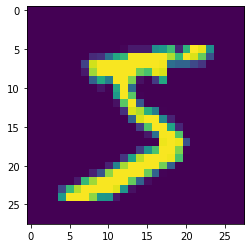

In [5]:
#plot the first image in the dataset
mon_image = X_train[0].reshape(28,28)
mon_image.shape
plt.imshow(mon_image)

In [6]:
mon_image.dtype

dtype('float32')

In [0]:
def create_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])
  
  model.compile(
      optimizer='adam', 
      loss='categorical_crossentropy', 
      metrics=['accuracy'])

  return model

# <font color="teal">GPU</font>


En mode TPU, passez directement à la ligne TPU

In [0]:
model = create_model()

In [8]:
#train the model
%%time
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 15s 255us/sample - loss: 0.1249 - accuracy: 0.9619 - val_loss: 0.0469 - val_accuracy: 0.9849
Epoch 2/3
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0449 - accuracy: 0.9864 - val_loss: 0.0436 - val_accuracy: 0.9863
Epoch 3/3
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.0476 - val_accuracy: 0.9857
CPU times: user 28.5 s, sys: 4.09 s, total: 32.6 s
Wall time: 32.3 s


Avec le CPU, on a les résultats suivants : 

Train on 60000 samples, validate on 10000 samples

Epoch 1/3
60000/60000 [==============================] - 155s 3ms/sample - loss: 0.1294 - accuracy: 0.9610 - val_loss: 0.0544 - val_accuracy: 0.9821

Epoch 2/3
60000/60000 [==============================] - 154s 3ms/sample - loss: 0.0471 - accuracy: 0.9851 - val_loss: 0.0500 - val_accuracy: 0.9849

Epoch 3/3
60000/60000 [==============================] - 154s 3ms/sample - loss: 0.0313 - accuracy: 0.9897 - val_loss: 0.0408 - val_accuracy: 0.9871

CPU times: user 14min, sys: 14.8 s, total: 14min 15s
Wall time: 7min 42s


## <font color="orange">GPU</font>

A partir d'ici on peut recommencer depuis le début avec le mode GPU

Avec le GPU on a les temps suivants : 

Train on 60000 samples, validate on 10000 samples

Epoch 1/3
60000/60000 [==============================] - 13s 220us/sample - loss: 0.2416 - accuracy: 0.9510 - val_loss: 0.0797 - val_accuracy: 0.9743

Epoch 2/3
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0722 - accuracy: 0.9776 - val_loss: 0.0931 - val_accuracy: 0.9727

Epoch 3/3
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0505 - accuracy: 0.9845 - val_loss: 0.0836 - val_accuracy: 0.9742

CPU times: user 22.5 s, sys: 3.42 s, total: 25.9 s
Wall time: 26.6 s

[![](https://raw.githubusercontent.com/BackProp-fr/meetup/master/images/LogoBackPropTranspSmall.png)](https://www.backprop.fr)

Le temps d'exécution en mode GPU est, selon les moments, entre 10x et 40x inférieur

On passe de 16mins 47s à 22.5s soit 44 fois moins !

## <font color="orange">TPU</font>

Avec les TPU on a (si on ne change rien à la programmation, c'est à dire si on fait comme si on utilisait un GPU, on ne sait d'ailleurs pas ce qui est fait)

Train on 60000 samples, validate on 10000 samples

Epoch 1/3
60000/60000 [==============================] - 183s 3ms/sample - loss: 0.1294 - accuracy: 0.9614 - val_loss: 0.0522 - val_accuracy: 0.9838

Epoch 2/3
60000/60000 [==============================] - 184s 3ms/sample - loss: 0.0490 - accuracy: 0.9850 - val_loss: 0.0539 - val_accuracy: 0.9825

Epoch 3/3
60000/60000 [==============================] - 189s 3ms/sample - loss: 0.0331 - accuracy: 0.9900 - val_loss: 0.0429 - val_accuracy: 0.9866

CPU times: user 16min 42s, sys: 18.7 s, total: 17min 1s
Wall time: 9min 15s

In [9]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[3.3868536e-10, 2.5384984e-11, 7.9467554e-08, 4.8206712e-05,
        1.1444599e-10, 1.2426697e-09, 4.1493148e-16, 9.9995100e-01,
        2.4035016e-08, 6.8653816e-07],
       [4.9192590e-08, 3.4795340e-07, 9.9999952e-01, 1.0834928e-08,
        1.6498177e-12, 9.0034917e-11, 1.3534873e-07, 1.6565513e-14,
        3.3975418e-08, 1.1672646e-14],
       [1.4948826e-06, 9.9404091e-01, 3.0801953e-03, 8.3905064e-07,
        9.5109153e-04, 1.8509762e-05, 1.7570300e-06, 5.6205099e-05,
        1.8482264e-03, 5.4234800e-07],
       [9.9999964e-01, 7.8003638e-11, 2.3971484e-07, 8.3444424e-10,
        1.4592913e-10, 7.7540419e-10, 8.1500787e-08, 1.2818511e-09,
        1.6225464e-08, 3.1669889e-09]], dtype=float32)

In [10]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# <font color="teal">TPU</font>


[![](https://raw.githubusercontent.com/BackProp-fr/meetup/master/images/LogoBackPropTranspSmall.png)](https://www.backprop.fr)

A partir d'ici, il faut passer en mode TPU. 

Exécution / Modifier le type d'exécution / TPU

Exécution / Redémarrerr l'environnement d'exécution

Réexécutez les imports de début du code + les fonctions jusqu'à la création du modèle

Non seulement, on force GCP à utiliser le TPU mais on programme aussi différemment pour prendre en compte les spécificités du TPU

In [8]:
tf.executing_eagerly()

True

Il ne faut pas être en mode eager

In [0]:
tf.compat.v1.disable_eager_execution()

In [10]:
tf.executing_eagerly()

False

[![](https://raw.githubusercontent.com/BackProp-fr/meetup/master/images/LogoBackPropTranspSmall.png)](https://www.backprop.fr)

[TPUStrategy](https://www.tensorflow.org/guide/distributed_training)

tf.distribute.experimental.TPUStrategy lets you run your TensorFlow training on Tensor Processing Units (TPUs). TPUs are Google's specialized ASICs designed to dramatically accelerate machine learning workloads. They are available on Google Colab, the TensorFlow Research Cloud and Cloud TPU.

In terms of distributed training architecture, TPUStrategy is the same MirroredStrategy - it implements synchronous distributed training. TPUs provide their own implementation of efficient all-reduce and other collective operations across multiple TPU cores, which are used in TPUStrategy.

Here is how you would instantiate TPUStrategy:

[![](https://raw.githubusercontent.com/BackProp-fr/meetup/master/images/LogoBackPropTranspSmall.png)](https://www.backprop.fr)

Class [TPUClusterResolver](https://www.tensorflow.org/api_docs/python/tf/distribute/cluster_resolver/TPUClusterResolver)

This is an implementation of cluster resolvers for the Google Cloud TPU service. As Cloud TPUs are in alpha, you will need to specify a API definition file for this to consume, in addition to a list of Cloud TPUs in your Google Cloud Platform project.

[![](https://raw.githubusercontent.com/BackProp-fr/meetup/master/images/LogoBackPropTranspSmall.png)](https://www.backprop.fr)

tf.config.[experimental_connect_to_cluster](https://www.tensorflow.org/api_docs/python/tf/config/experimental_connect_to_cluster)

Connects to the given cluster.

Will make devices on the cluster available to use. Note that calling this more than once will work, but will invalidate any tensor handles on the old remote devices.

If the given local job name is not present in the cluster specification, it will be automatically added, using an unused port on the localhost.

[![](https://raw.githubusercontent.com/BackProp-fr/meetup/master/images/LogoBackPropTranspSmall.png)](https://www.backprop.fr)

tf.tpu.experimental.[initialize_tpu_system](https://www.tensorflow.org/api_docs/python/tf/tpu/experimental/initialize_tpu_system)

Initialize the TPU devices.

In [11]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Running on TPU  ['10.70.116.226:8470']
INFO:tensorflow:Initializing the TPU system: 10.70.116.226:8470


INFO:tensorflow:Initializing the TPU system: 10.70.116.226:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Querying Tensorflow master (grpc://10.70.116.226:8470) for TPU system metadata.


INFO:tensorflow:Querying Tensorflow master (grpc://10.70.116.226:8470) for TPU system metadata.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 1958581413149856773)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 1958581413149856773)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 12857563142458586554)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 12857563142458586554)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 7060905907629160575)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 7060905907629160575)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 11205962453745526484)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 11205962453745526484)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, 1488161544966279727)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, 1488161544966279727)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 14016660825454483113)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 14016660825454483113)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, 13634079942559876641)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, 13634079942559876641)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 17179869184, 2879509415842815923)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 17179869184, 2879509415842815923)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 17179869184, 5574702418338226445)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 17179869184, 5574702418338226445)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 8589934592, 8113252783876224115)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 8589934592, 8113252783876224115)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 1685068716863653638)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 1685068716863653638)


We've integrated tf.distribute.Strategy into tf.keras which is TensorFlow's implementation of the Keras API specification. tf.keras is a high-level API to build and train models. By integrating into tf.keras backend, we've made it seamless for you to distribute your training written in the Keras training framework.

Here's what you need to change in your code:

- Create an instance of the appropriate tf.distribute.Strategy
- Move the creation and compiling of Keras model inside strategy.scope.

In [12]:
with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  model = create_model()
  model.compile(
      optimizer='adam', 
      loss='categorical_crossentropy', 
      metrics=['accuracy'])
  
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [13]:
tpu.num_accelerators()

{'TPU': 8}

In [14]:
tpu.get_master()

'grpc://10.70.116.226:8470'

In [15]:
%%time
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1874/1875 [============================>.] - ETA: 0s - loss: 0.1245 - accuracy: 0.9625INFO:tensorflow:Running validation at fit epoch: 0


INFO:tensorflow:Running validation at fit epoch: 0


1875/1875 [==============================] - 19s 10ms/step - loss: 0.1245 - accuracy: 0.9625 - val_loss: 0.0571 - val_accuracy: 0.9803
Epoch 2/3
1870/1875 [============================>.] - ETA: 0s - loss: 0.0470 - accuracy: 0.9857INFO:tensorflow:Running validation at fit epoch: 1


INFO:tensorflow:Running validation at fit epoch: 1


1875/1875 [==============================] - 18s 10ms/step - loss: 0.0470 - accuracy: 0.9857 - val_loss: 0.0468 - val_accuracy: 0.9838
Epoch 3/3
1874/1875 [============================>.] - ETA: 0s - loss: 0.0297 - accuracy: 0.9907INFO:tensorflow:Running validation at fit epoch: 2


INFO:tensorflow:Running validation at fit epoch: 2


1875/1875 [==============================] - 18s 10ms/step - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.0476 - val_accuracy: 0.9852
CPU times: user 12.9 s, sys: 1.49 s, total: 14.4 s
Wall time: 1min


On obtient les résultats suivants :

Epoch 1/3
1873/1875 [============================>.] - ETA: 0s - loss: 0.0205 - accuracy: 0.9933INFO:tensorflow:Running validation at fit epoch: 0
INFO:tensorflow:Running validation at fit epoch: 0

313/313 [==============================] - 7s 24ms/step

313/313 [==============================] - 7s 24ms/step

1875/1875 [==============================] - 21s 11ms/step 
- loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0574 - val_accuracy: 0.9831

Epoch 2/3

1867/1875 [============================>.] - ETA: 0s - loss: 0.0149 - accuracy: 0.9949INFO:tensorflow:Running validation at fit epoch: 1
INFO:tensorflow:Running validation at fit epoch: 1

313/313 [==============================] - 8s 27ms/step

313/313 [==============================] - 8s 27ms/step

1875/1875 [==============================] - 22s 12ms/step 

- loss: 0.0149 - accuracy: 0.9949 - val_loss: 0.0784 - val_accuracy: 0.9794

Epoch 3/3

1866/1875 [============================>.] - ETA: 0s - loss: 0.0107 - accuracy: 0.9964INFO:tensorflow:Running validation at fit epoch: 2
INFO:tensorflow:Running validation at fit epoch: 2

313/313 [==============================] - 9s 30ms/step

313/313 [==============================] - 9s 30ms/step

1875/1875 [==============================] - 23s 12ms/step 

- loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.1103 - val_accuracy: 0.9745

CPU times: user 12.1 s, sys: 1.09 s, total: 13.2 s
Wall time: 1min 17s




[![](https://raw.githubusercontent.com/BackProp-fr/meetup/master/images/LogoBackPropTranspSmall.png)](https://www.backprop.fr)

Le temps d'exécution est plus rapide et l'accuracy est meilleure

In [16]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[9.4097126e-11, 6.4637212e-10, 4.7197179e-08, 6.5797344e-08,
        4.6406565e-10, 3.8603714e-11, 6.9782763e-17, 9.9999976e-01,
        1.4314699e-10, 7.1423983e-08],
       [5.1614609e-08, 1.6818255e-07, 9.9979204e-01, 7.9136636e-10,
        1.9939832e-10, 1.1113734e-09, 2.0556501e-04, 5.3176376e-14,
        2.1223739e-06, 1.1100900e-09],
       [1.1973402e-08, 9.9856323e-01, 2.7786166e-04, 3.7105876e-09,
        1.1171389e-03, 1.7416945e-06, 2.3968497e-07, 1.3214829e-05,
        2.6576450e-05, 2.0295044e-08],
       [9.9999797e-01, 1.2556397e-13, 1.6738706e-07, 1.2223725e-12,
        2.4853770e-09, 1.0082751e-10, 6.6949667e-07, 3.4069476e-09,
        4.9275330e-09, 1.1858571e-06]], dtype=float32)

In [17]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)